In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
pd.isnull(df).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

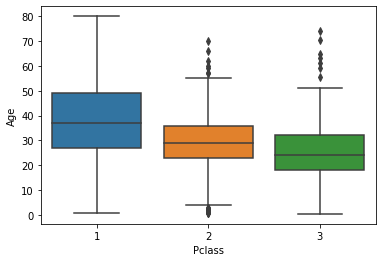

In [4]:
sns.boxplot(x = 'Pclass', y = 'Age',data = df)

In [5]:
def insert_age(x):
    age = x[0]
    p = x[1]
    if pd.isnull(age):
        if p == 1:
            return 37
        elif p == 2:
            return 29
        else:
            return 25
    else:
        return age

In [6]:
df['Age'] = df[['Age','Pclass']].apply(insert_age,axis = 1)

In [7]:
pd.isnull(df).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

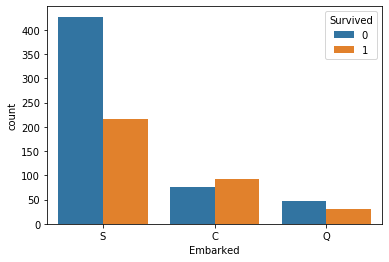

In [8]:
sns.countplot(x = 'Embarked',data = df,hue = 'Survived')

In [9]:
df['Embarked'] = df['Embarked'].fillna('S')

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.035435,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.050633,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.400570,0.083081,0.018443,-0.549500
Age,0.035435,-0.050633,-0.400570,1.000000,-0.242750,-0.173999,0.120239
SibSp,-0.057527,-0.035322,0.083081,-0.242750,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.173999,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.120239,0.159651,0.216225,1.000000


In [13]:
x = df.drop(['PassengerId','Survived','Name','Parch','Cabin'],axis = 1)

In [14]:
x.head()

,Pclass,Sex,Age,SibSp,Ticket,Fare,Embarked
0,3,male,22.0,1,A/5 21171,7.2500,S
1,1,female,38.0,1,PC 17599,71.2833,C
2,3,female,26.0,0,STON/O2. 3101282,7.9250,S
3,1,female,35.0,1,113803,53.1000,S
4,3,male,35.0,0,373450,8.0500,S


In [15]:
id = pd.get_dummies(x.Sex, drop_first= True)

In [16]:
em = pd.get_dummies(x.Embarked, drop_first = True)

In [17]:
x = pd.concat([x,id,em],axis = 1)

In [18]:
x.head()

,Pclass,Sex,Age,SibSp,Ticket,Fare,Embarked,male,Q,S
0,3,male,22.0,1,A/5 21171,7.2500,S,1,0,1
1,1,female,38.0,1,PC 17599,71.2833,C,0,0,0
2,3,female,26.0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,1,female,35.0,1,113803,53.1000,S,0,0,1
4,3,male,35.0,0,373450,8.0500,S,1,0,1


In [19]:
x.drop(['Sex','Ticket','Embarked'],inplace = True,axis = 1)

In [20]:
x.head()

,Pclass,Age,SibSp,Fare,male,Q,S
0,3,22.0,1,7.2500,1,0,1
1,1,38.0,1,71.2833,0,0,0
2,3,26.0,0,7.9250,0,0,1
3,1,35.0,1,53.1000,0,0,1
4,3,35.0,0,8.0500,1,0,1


In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [22]:
y = df['Survived']

In [23]:
model.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
test = pd.read_csv('test.csv')

In [25]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [26]:
pd.isnull(test).sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

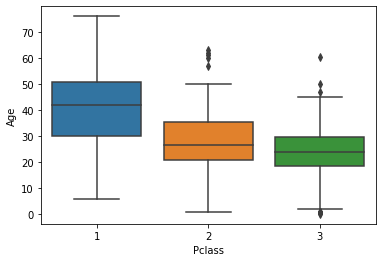

In [27]:
sns.boxplot(x = 'Pclass',y = 'Age',data = test)

In [28]:
def insertage(x):
    age = x[0]
    p = x[1]
    if pd.isnull(age):
        if p == 1:
            return 42
        elif p ==2:
            return 27
        else:
            return 24
    else:
        return age

In [29]:
test['Age'] = test[['Age','Pclass']].apply(insertage,axis = 1)

In [30]:
pd.isnull(test).sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

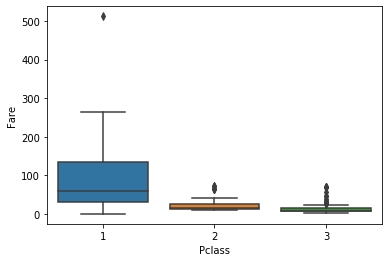

In [31]:
sns.boxplot(x = 'Pclass',y = 'Fare',data = test)

In [32]:
def insertfare(x):
    fare = x[0]
    p = x[1]
    if pd.isnull(fare):
        if p == 1:
            return 55
        else:
            return 20
    else:
        return fare

In [33]:
test['Fare'] = test[['Fare','Pclass']].apply(insertfare,axis = 1)

In [34]:
pd.isnull(test).sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [35]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [36]:
x_test = test.drop(['PassengerId','Name','Ticket','Cabin'],axis = 1)

In [37]:
x_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [38]:
a = pd.get_dummies(x_test.Sex,drop_first=True)

In [39]:
b = pd.get_dummies(x_test.Embarked , drop_first = True)

In [40]:
x_test = pd.concat([x_test,a,b],axis = 1)

In [41]:
x_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,3,male,34.5,0,0,7.8292,Q,1,1,0
1,3,female,47.0,1,0,7.0000,S,0,0,1
2,2,male,62.0,0,0,9.6875,Q,1,1,0
3,3,male,27.0,0,0,8.6625,S,1,0,1
4,3,female,22.0,1,1,12.2875,S,0,0,1


In [42]:
x_test.drop(['Sex','Embarked'],inplace = True,axis = 1)

In [46]:
x_test.drop('Parch',inplace = True,axis = 1)
x_test.head()

,Pclass,Age,SibSp,Fare,male,Q,S
0,3,34.5,0,7.8292,1,1,0
1,3,47.0,1,7.0000,0,0,1
2,2,62.0,0,9.6875,1,1,0
3,3,27.0,0,8.6625,1,0,1
4,3,22.0,1,12.2875,0,0,1


In [45]:
x.head()

,Pclass,Age,SibSp,Fare,male,Q,S
0,3,22.0,1,7.2500,1,0,1
1,1,38.0,1,71.2833,0,0,0
2,3,26.0,0,7.9250,0,0,1
3,1,35.0,1,53.1000,0,0,1
4,3,35.0,0,8.0500,1,0,1


In [47]:
from sklearn.model_selection import train_test_split
x_tr,x_t,y_tr,y_t = train_test_split(x,y,test_size = 0.2)

In [48]:
model.fit(x_tr,y_tr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
model.score(x_t,y_t)

0.8324022346368715

In [50]:
model.score(x_tr,y_tr)

0.8061797752808989

In [52]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [53]:
id = test['PassengerId']

In [54]:
temp = model.predict(x_test)

In [65]:
h = pd.DataFrame(temp)
h=h[["PassengerId","Survived"]]
h.head()

KeyError: "None of [Index(['PassengerId', 'Survived'], dtype='object')] are in the [columns]"

In [62]:
final = pd.concat([id,h],axis = 1)

In [63]:
final.head()

,PassengerId,0
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [64]:
final.to_csv('results.csv',index = False)